In [38]:
from pycaret.anomaly import *

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [88]:
import matplotlib.pyplot as plt

In [40]:
pip install pretty-confusion-matrix

  Using cached pretty_confusion_matrix-0.1.1-py3-none-any.whl (9.6 kB)
  Using cached black-21.12b0-py3-none-any.whl (156 kB)
  Using cached pre_commit-2.19.0-py2.py3-none-any.whl (199 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached isort-5.10.1-py3-none-any.whl (103 kB)
  Using cached flake8-3.9.2-py2.py3-none-any.whl (73 kB)
  Using cached platformdirs-2.5.2-py3-none-any.whl (14 kB)
  Using cached pathspec-0.9.0-py2.py3-none-any.whl (31 kB)
  Using cached mypy_extensions-0.4.3-py2.py3-none-any.whl (4.5 kB)
  Using cached tomli-1.2.3-py3-none-any.whl (12 kB)
  Using cached mccabe-0.6.1-py2.py3-none-any.whl (8.6 kB)
  Using cached pycodestyle-2.7.0-py2.py3-none-any.whl (41 kB)
  Using cached pyflakes-2.3.1-py2.py3-none-any.whl (68 kB)
  Using cached nodeenv-1.6.0-py2.py3-none-any.whl (21 kB)
  Using cached cfgv-3.3.1-py2.py3-none-any.whl (7.3 kB)
  Using cached identify-2.5.1-py2.py3-none-any.whl (98 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using

In [114]:
from pretty_confusion_matrix import pp_matrix_from_data

In [124]:
from sklearn.preprocessing import StandardScaler

In [188]:
df = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/df.csv')
y = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/Labels.csv')

In [189]:
df['Label']=y['Label']

In [190]:
df

Unnamed: 0  Node 11  Link 9  Link 10  Link 11  Link 12  Link 22  \
0               0     18.0   417.6    417.6     18.0     14.4     18.0   
1               1     18.0   414.0    414.0     18.0     10.8     14.4   
2               2     14.4   410.4    410.4     14.4     10.8     14.4   
3               3     14.4   406.8    406.8     14.4      7.2     14.4   
4               4     14.4   403.2    403.2     14.4      7.2     14.4   
...           ...      ...     ...      ...      ...      ...      ...   
17515       17515     32.4   244.8    244.8     32.4     43.2      7.2   
17516       17516     25.2   223.2    223.2     25.2     43.2      7.2   
17517       17517     25.2   212.4    212.4     25.2     39.6      7.2   
17518       17518     25.2   190.8    190.8     25.2     36.0      7.2   
17519       17519     21.6   172.8    172.8     21.6     32.4      7.2   

       Link 111  Link 112  Link 113  ...  Pressure 10  Pressure 11  \
0          82.8       7.2      -0.0  ...       90.960       83.933   
1          82.8      -0.0      -0.0  ...       91.552       84.626   
2          82.8      -7.2      -3.6  ...       92.190       85.373   
3          82.8     -10.8      -3.6  ...       92.841       86.136   
4          79.2     -10.8      -3.6  ...       93.473       86.877   
...         ...       ...       ...  ...          ...          ...   
17515      61.2      72.0      21.6  ...      115.912      113.291   
17516      57.6      68.4      21.6  ...      117.959      115.719   
17517      54.0      64.8      18.0  ...      119.255      117.259   
17518      46.8      54.0      18.0  ...      120.973      119.305   
17519      43.2      50.4      14.4  ...      122.545      121.180   

       Pressure 12  Pressure 13  Pressure 21  Pressure 22  Pressure 23  \
0           82.376       83.821       82.924       83.883       85.348   
1           83.118       84.592       83.704       84.642       86.118   
2           83.885       85.367       84.543       85.420       86.896   
3           84.674       86.173       85.377       86.227       87.708   
4           85.474       86.978       86.177       87.033       88.512   
...            ...          ...          ...          ...          ...   
17515      115.172      115.984      113.958      115.485      116.993   
17516      117.753      118.577      116.643      118.169      119.677   
17517      119.409      120.338      118.449      119.985      121.497   
17518      121.615      122.657      120.882      122.407      123.918   
17519      123.622      124.741      122.960      124.495      126.011   

       Pressure 31  Pressure 32  Labels  
0           82.347       78.977     0.0  
1           83.177       79.839     0.0  
2           84.089       80.757     0.0  
3           84.937       81.598     0.0  
4           85.716       82.413     0.0  
...            ...          ...     ...  
17515      112.842      109.367     0.0  
17516      115.563      112.170     0.0  
17517      117.493      114.230     0.0  
17518      120.128      116.825     0.0  
17519      122.338      119.132     0.0  

[17520 rows x 23 columns]

In [191]:
df =df.drop(df.columns[0], axis=1)

In [135]:
scaler = StandardScaler()

In [136]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [172]:
df= scaler.transform(df)
df= pd.DataFrame(df)
df

0         1         2         3         4          5         6   \
0      30.503287  0.075428 -2.104783 -0.840344 -1.249816  20.339031 -2.072101   
1      30.223433  0.060864 -2.104783 -1.120198 -1.495676  20.339031 -2.406180   
2      29.943579  0.046300 -2.146237 -1.120198 -1.495676  20.339031 -2.740259   
3      29.663725  0.031736 -2.146237 -1.400052 -1.495676  20.339031 -2.907298   
4      29.383871  0.017172 -2.146237 -1.400052 -1.495676  19.349497 -2.907298   
...          ...       ...       ...       ...       ...        ...       ...   
17515  17.070302 -0.623648 -1.938967  1.398487 -1.987396  14.401831  0.934611   
17516  15.391179 -0.711032 -2.021875  1.398487 -1.987396  13.412298  0.767571   
17517  14.551617 -0.754725 -2.021875  1.118633 -1.987396  12.422765  0.600532   
17518  12.872494 -0.842109 -2.021875  0.838779 -1.987396  10.443698  0.099413   
17519  11.473225 -0.914929 -2.063329  0.558925 -1.987396   9.454165 -0.067626   

             7         8         9   ...         11        12        13  \
0     -2.384515  0.428660 -1.540989  ...   7.106999  0.059020  0.069799   
1     -2.384515  0.428660 -1.540989  ...   7.191251  0.072299  0.084234   
2     -2.528121 -0.022398 -1.849015  ...   7.282049  0.086613  0.099155   
3     -2.528121 -0.022398 -1.849015  ...   7.374698  0.101233  0.114504   
4     -2.528121 -0.022398 -1.849015  ...   7.464642  0.115432  0.130067   
...         ...       ...       ...  ...        ...       ...       ...   
17515 -1.522879  1.781837 -0.924938  ...  10.658099  0.621563  0.707802   
17516 -1.522879  1.330778 -0.924938  ...  10.949422  0.668087  0.758011   
17517 -1.666485  1.330778 -0.924938  ...  11.133865  0.697596  0.790227   
17518 -1.666485  0.879719 -0.924938  ...  11.378366  0.736801  0.833141   
17519 -1.810091  0.428660 -1.232964  ...  11.602089  0.772728  0.872185   

             14        15        16        17        18        19        20  
0      0.056865  0.021392  0.077511  0.076202 -0.012591 -0.001611 -1.507788  
1      0.071958  0.036721  0.092467  0.091374  0.003763  0.015502 -1.507788  
2      0.087130  0.053210  0.107799  0.106704  0.021733  0.033727 -1.507788  
3      0.102908  0.069600  0.123701  0.122703  0.038441  0.050423 -1.507788  
4      0.118667  0.085322  0.139584  0.138545  0.053790  0.066604 -1.507788  
...         ...       ...       ...       ...       ...       ...       ...  
17515  0.686496  0.631288  0.700250  0.699727  0.588265  0.601721 -1.507788  
17516  0.737257  0.684055  0.753140  0.752612  0.641878  0.657369 -1.507788  
17517  0.771731  0.719547  0.788926  0.788473  0.679906  0.698266 -1.507788  
17518  0.817128  0.767362  0.836653  0.836175  0.731825  0.749784 -1.507788  
17519  0.857925  0.808200  0.877799  0.877415  0.775369  0.795585 -1.507788  

[17520 rows x 21 columns]

In [192]:
X_train, X_test=train_test_split(df, test_size=0.2,random_state=3)

In [193]:
s=setup(X_train,normalize = True)

In [173]:
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [194]:
svm = create_model('svm')
print(svm)

OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


In [146]:
plot_model(svm, plot = 'umap')

In [147]:
result = assign_model(svm)
result

0         1         2         3         4         5         6  \
7691  -2.124081 -1.620562 -2.338984 -2.124081 -2.660231 -3.298053 -2.523063   
4592  -2.124475 -1.620561 -2.338984 -2.124475 -2.660231 -3.256953 -2.523080   
11794 -2.123686 -1.620561 -2.338982 -2.123686 -2.659761 -3.256953 -2.522930   
15563 -2.123949 -1.620562 -2.338983 -2.123949 -2.660152 -3.298053 -2.523047   
10417 -2.124081 -1.620562 -2.338983 -2.124081 -2.660074 -3.277503 -2.523047   
...         ...       ...       ...       ...       ...       ...       ...   
6400  -2.124344 -1.620561 -2.338984 -2.124344 -2.660231 -3.256953 -2.523080   
15288 -2.123555 -1.620561 -2.338982 -2.123555 -2.659761 -3.277503 -2.522930   
11513 -2.123292 -1.620561 -2.338981 -2.123292 -2.659526 -3.256953 -2.522863   
1688  -2.124606 -1.620561 -2.338985 -2.124606 -2.660466 -3.298053 -2.523163   
5994  -2.124475 -1.620561 -2.338984 -2.124475 -2.660309 -3.277503 -2.523097   

              7         8         9  ...        13        14        15  \
7691  -2.483471 -2.599762 -2.357780  ... -1.563106 -1.615645 -1.640493   
4592  -2.483480 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   
11794 -2.483379 -2.597100 -2.357008  ... -1.563108 -1.615647 -1.640495   
15563 -2.483452 -2.599762 -2.357587  ... -1.563107 -1.615645 -1.640493   
10417 -2.483452 -2.599762 -2.357394  ... -1.563107 -1.615645 -1.640493   
...         ...       ...       ...  ...       ...       ...       ...   
6400  -2.483471 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   
15288 -2.483379 -2.597100 -2.357008  ... -1.563108 -1.615646 -1.640495   
11513 -2.483334 -2.596213 -2.356429  ... -1.563109 -1.615648 -1.640497   
1688  -2.483525 -2.601536 -2.358359  ... -1.563124 -1.615662 -1.640511   
5994  -2.483489 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   

             16        17        18        19        20  Anomaly  \
7691  -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
4592  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
11794 -1.607115 -1.637724 -1.667957 -1.601314 -1.538402        0   
15563 -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
10417 -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
...         ...       ...       ...       ...       ...      ...   
6400  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
15288 -1.607115 -1.637724 -1.667957 -1.601314 -1.538402        0   
11513 -1.607116 -1.637726 -1.667959 -1.601316 -1.538404        0   
1688  -1.607131 -1.637740 -1.667973 -1.601330 -1.538418        0   
5994  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   

       Anomaly_Score  
7691        0.181210  
4592        0.016956  
11794      -0.023163  
15563       0.181219  
10417      -0.054239  
...              ...  
6400        0.016917  
15288      -0.044950  
11513      -0.012971  
1688        0.237715  
5994       -0.003509  

[14016 rows x 23 columns]

In [148]:
result.describe()

0             1             2             3             4  \
count  14016.000000  1.401600e+04  14016.000000  14016.000000  14016.000000   
mean      -2.123949 -1.620561e+00     -2.338983     -2.123949     -2.659989   
std        0.000470  6.619091e-08      0.000002      0.000470      0.000318   
min       -2.124738 -1.620562e+00     -2.339003     -2.124738     -2.660701   
25%       -2.124475 -1.620562e+00     -2.338984     -2.124475     -2.660231   
50%       -2.123949 -1.620561e+00     -2.338983     -2.123949     -2.659996   
75%       -2.123555 -1.620561e+00     -2.338982     -2.123555     -2.659761   
max       -2.122634 -1.620561e+00     -2.338978     -2.122634     -2.658195   

                  5             6             7             8             9  \
count  14016.000000  14016.000000  14016.000000  14016.000000  14016.000000   
mean      -3.268257     -2.523006     -2.483429     -2.598830     -2.357393   
std        0.020415      0.000099      0.000063      0.001959      0.000626   
min       -3.585755     -2.523848     -2.483616     -2.604198     -2.358359   
25%       -3.277503     -2.523097     -2.483480     -2.600649     -2.357973   
50%       -3.256953     -2.523013     -2.483434     -2.598875     -2.357394   
75%       -3.256953     -2.522930     -2.483379     -2.597100     -2.356815   
max       -3.195303     -2.522746     -2.482951     -2.581131     -2.355658   

       ...            13            14            15            16  \
count  ...  14016.000000  14016.000000  14016.000000  14016.000000   
mean   ...     -1.563113     -1.615651     -1.640500     -1.607120   
std    ...      0.000007      0.000008      0.000008      0.000008   
min    ...     -1.563124     -1.615662     -1.640511     -1.607131   
25%    ...     -1.563124     -1.615662     -1.640511     -1.607131   
50%    ...     -1.563109     -1.615647     -1.640496     -1.607115   
75%    ...     -1.563107     -1.615646     -1.640494     -1.607114   
max    ...     -1.563106     -1.615644     -1.640492     -1.607112   

                 17            18            19            20       Anomaly  \
count  14016.000000  14016.000000  14016.000000  14016.000000  14016.000000   
mean      -1.637729     -1.667962     -1.601319     -1.538407      0.050014   
std        0.000008      0.000008      0.000008      0.000008      0.217982   
min       -1.637741     -1.667973     -1.601331     -1.538419      0.000000   
25%       -1.637740     -1.667973     -1.601330     -1.538418      0.000000   
50%       -1.637725     -1.667958     -1.601315     -1.538403      0.000000   
75%       -1.637723     -1.667956     -1.601313     -1.538401      0.000000   
max       -1.637722     -1.667954     -1.601311     -1.538399      1.000000   

       Anomaly_Score  
count   14016.000000  
mean        0.072476  
std         0.396014  
min        -0.054256  
25%        -0.028165  
50%        -0.000051  
75%         0.182377  
max        30.728868  

[8 rows x 23 columns]

In [149]:
predictions = predict_model(svm, data = X_test)
predictions

0         1         2         3         4         5         6  \
14658 -2.123292 -1.620561 -2.338981 -2.123292 -2.659604 -3.236403 -2.522863   
16322 -2.124212 -1.620562 -2.338984 -2.124212 -2.660309 -3.298053 -2.523097   
14447 -2.124081 -1.620562 -2.338983 -2.124081 -2.660152 -3.277503 -2.523047   
7817  -2.123423 -1.620561 -2.338981 -2.123423 -2.659526 -3.236403 -2.522863   
9004  -2.123160 -1.620561 -2.338980 -2.123160 -2.659448 -3.256953 -2.522846   
...         ...       ...       ...       ...       ...       ...       ...   
2961  -2.124475 -1.620561 -2.338984 -2.124475 -2.660231 -3.256953 -2.523080   
16801 -2.124212 -1.620562 -2.338984 -2.124212 -2.660309 -3.298053 -2.523097   
4550  -2.124475 -1.620561 -2.338984 -2.124475 -2.660152 -3.256953 -2.523080   
7955  -2.123423 -1.620561 -2.338981 -2.123423 -2.659604 -3.256953 -2.522880   
3211  -2.124344 -1.620561 -2.338984 -2.124344 -2.660231 -3.277503 -2.523080   

              7         8         9  ...        13        14        15  \
14658 -2.483343 -2.596213 -2.356622  ... -1.563109 -1.615648 -1.640496   
16322 -2.483489 -2.600649 -2.357780  ... -1.563106 -1.615644 -1.640493   
14447 -2.483452 -2.599762 -2.357587  ... -1.563107 -1.615645 -1.640493   
7817  -2.483334 -2.596213 -2.356622  ... -1.563109 -1.615648 -1.640496   
9004  -2.483325 -2.596213 -2.356429  ... -1.563110 -1.615648 -1.640497   
...         ...       ...       ...  ...       ...       ...       ...   
2961  -2.483480 -2.599762 -2.357973  ... -1.563124 -1.615662 -1.640511   
16801 -2.483489 -2.600649 -2.357780  ... -1.563106 -1.615644 -1.640493   
4550  -2.483471 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   
7955  -2.483343 -2.596213 -2.356429  ... -1.563109 -1.615648 -1.640496   
3211  -2.483480 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   

             16        17        18        19        20  Anomaly  \
14658 -1.607116 -1.637726 -1.667959 -1.601316 -1.538404        1   
16322 -1.607112 -1.637722 -1.667955 -1.601312 -1.538399        0   
14447 -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
7817  -1.607116 -1.637726 -1.667959 -1.601316 -1.538404        1   
9004  -1.607117 -1.637726 -1.667959 -1.601316 -1.538404        0   
...         ...       ...       ...       ...       ...      ...   
2961  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
16801 -1.607112 -1.637722 -1.667955 -1.601312 -1.538399        0   
4550  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
7955  -1.607116 -1.637725 -1.667958 -1.601315 -1.538403        0   
3211  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   

       Anomaly_Score  
14658       0.314988  
16322       0.233866  
14447      -0.003778  
7817        0.314886  
9004        0.037541  
...              ...  
2961        0.016669  
16801       0.233866  
4550        0.016952  
7955        0.037199  
3211       -0.003556  

[3504 rows x 23 columns]

In [151]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

0             1             2             3             4  \
count  17520.000000  1.752000e+04  17520.000000  17520.000000  17520.000000   
mean      -2.123949 -1.620561e+00     -2.338983     -2.123949     -2.659989   
std        0.000470  6.621468e-08      0.000002      0.000470      0.000319   
min       -2.124738 -1.620562e+00     -2.339004     -2.124738     -2.660701   
25%       -2.124475 -1.620562e+00     -2.338984     -2.124475     -2.660231   
50%       -2.123949 -1.620561e+00     -2.338983     -2.123949     -2.659996   
75%       -2.123555 -1.620561e+00     -2.338982     -2.123555     -2.659761   
max       -2.122634 -1.620561e+00     -2.338978     -2.122634     -2.658195   

                  5             6             7             8             9  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      -3.268341     -2.523006     -2.483429     -2.598831     -2.357394   
std        0.020768      0.000100      0.000063      0.001967      0.000626   
min       -3.606305     -2.523864     -2.483616     -2.604198     -2.358359   
25%       -3.277503     -2.523097     -2.483480     -2.600649     -2.357973   
50%       -3.256953     -2.523013     -2.483434     -2.598875     -2.357394   
75%       -3.256953     -2.522930     -2.483379     -2.597100     -2.356815   
max       -3.195303     -2.522746     -2.482951     -2.581131     -2.355658   

       ...            13            14            15            16  \
count  ...  17520.000000  17520.000000  17520.000000  17520.000000   
mean   ...     -1.563113     -1.615651     -1.640500     -1.607120   
std    ...      0.000007      0.000008      0.000008      0.000008   
min    ...     -1.563124     -1.615662     -1.640511     -1.607131   
25%    ...     -1.563124     -1.615662     -1.640511     -1.607131   
50%    ...     -1.563109     -1.615647     -1.640496     -1.607115   
75%    ...     -1.563107     -1.615646     -1.640494     -1.607114   
max    ...     -1.563106     -1.615644     -1.640492     -1.607112   

                 17            18            19            20       Anomaly  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      -1.637729     -1.667962     -1.601319     -1.538407      0.064212   
std        0.000008      0.000008      0.000008      0.000008      0.245138   
min       -1.637741     -1.667973     -1.601331     -1.538419      0.000000   
25%       -1.637740     -1.667973     -1.601330     -1.538418      0.000000   
50%       -1.637725     -1.667958     -1.601315     -1.538403      0.000000   
75%       -1.637723     -1.667956     -1.601313     -1.538401      0.000000   
max       -1.637722     -1.667954     -1.601311     -1.538399      1.000000   

       Anomaly_Score  
count   17520.000000  
mean        0.083874  
std         0.553093  
min        -0.054256  
25%        -0.022995  
50%         0.016665  
75%         0.182401  
max        34.807947  

[8 rows x 23 columns]

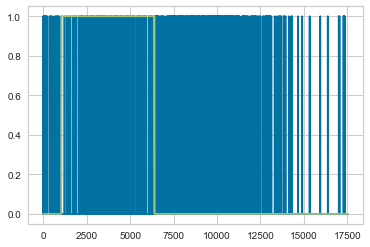

In [152]:
plt.plot(tot.index, tot["Anomaly"] )
plt.plot(y.index, y["Label"] )

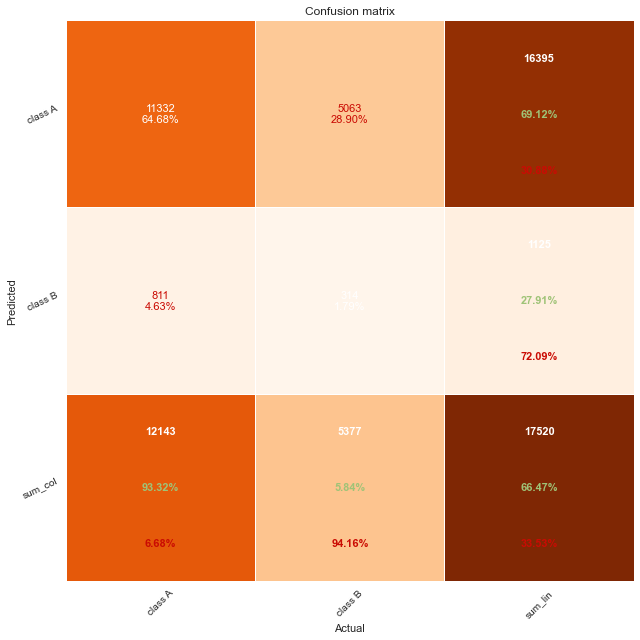

In [153]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])

In [ ]:
#prochain modèle : isolation forest

In [102]:
iforest = create_model('iforest')
print(iforest)


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7754, verbose=0)


In [154]:
plot_model(iforest, plot = 'umap')

In [155]:
result = assign_model(iforest)
result

0         1         2         3         4         5         6  \
7691  -2.124081 -1.620562 -2.338984 -2.124081 -2.660231 -3.298053 -2.523063   
4592  -2.124475 -1.620561 -2.338984 -2.124475 -2.660231 -3.256953 -2.523080   
11794 -2.123686 -1.620561 -2.338982 -2.123686 -2.659761 -3.256953 -2.522930   
15563 -2.123949 -1.620562 -2.338983 -2.123949 -2.660152 -3.298053 -2.523047   
10417 -2.124081 -1.620562 -2.338983 -2.124081 -2.660074 -3.277503 -2.523047   
...         ...       ...       ...       ...       ...       ...       ...   
6400  -2.124344 -1.620561 -2.338984 -2.124344 -2.660231 -3.256953 -2.523080   
15288 -2.123555 -1.620561 -2.338982 -2.123555 -2.659761 -3.277503 -2.522930   
11513 -2.123292 -1.620561 -2.338981 -2.123292 -2.659526 -3.256953 -2.522863   
1688  -2.124606 -1.620561 -2.338985 -2.124606 -2.660466 -3.298053 -2.523163   
5994  -2.124475 -1.620561 -2.338984 -2.124475 -2.660309 -3.277503 -2.523097   

              7         8         9  ...        13        14        15  \
7691  -2.483471 -2.599762 -2.357780  ... -1.563106 -1.615645 -1.640493   
4592  -2.483480 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   
11794 -2.483379 -2.597100 -2.357008  ... -1.563108 -1.615647 -1.640495   
15563 -2.483452 -2.599762 -2.357587  ... -1.563107 -1.615645 -1.640493   
10417 -2.483452 -2.599762 -2.357394  ... -1.563107 -1.615645 -1.640493   
...         ...       ...       ...  ...       ...       ...       ...   
6400  -2.483471 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   
15288 -2.483379 -2.597100 -2.357008  ... -1.563108 -1.615646 -1.640495   
11513 -2.483334 -2.596213 -2.356429  ... -1.563109 -1.615648 -1.640497   
1688  -2.483525 -2.601536 -2.358359  ... -1.563124 -1.615662 -1.640511   
5994  -2.483489 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   

             16        17        18        19        20  Anomaly  \
7691  -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
4592  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
11794 -1.607115 -1.637724 -1.667957 -1.601314 -1.538402        0   
15563 -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
10417 -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
...         ...       ...       ...       ...       ...      ...   
6400  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
15288 -1.607115 -1.637724 -1.667957 -1.601314 -1.538402        0   
11513 -1.607116 -1.637726 -1.667959 -1.601316 -1.538404        0   
1688  -1.607131 -1.637740 -1.667973 -1.601330 -1.538418        0   
5994  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   

       Anomaly_Score  
7691       -0.084983  
4592       -0.160871  
11794      -0.158248  
15563      -0.083230  
10417      -0.076484  
...              ...  
6400       -0.076557  
15288      -0.151241  
11513      -0.132599  
1688       -0.038174  
5994       -0.087903  

[14016 rows x 23 columns]

In [174]:
predictions = predict_model(iforest, data = X_test)
predictions

ValueError: Number of features of the model must match the input. Model n_features is 21 and input n_features is 22.

In [105]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

Node 11        Link 9       Link 10       Link 11       Link 12  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      25.210068    398.955411    200.786096     25.210068     36.300411   
std       12.864225    247.190489     86.845689     12.864225     14.642897   
min        3.600000     93.600000   -986.400000      3.600000      3.600000   
25%       10.800000    223.200000    126.000000     10.800000     25.200000   
50%       25.200000    288.000000    198.000000     25.200000     36.000000   
75%       36.000000    759.600000    270.000000     36.000000     46.800000   
max       61.200000    759.600000    446.400000     61.200000    118.800000   

            Link 22      Link 111      Link 112      Link 113      Link 121  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean       8.805000     51.857466     59.776438     18.178767     25.210068   
std        3.638183     21.552400     25.069313      7.981448     11.687677   
min      -50.400000   -133.200000    -14.400000     -3.600000      7.200000   
25%        7.200000     32.400000     39.600000     10.800000     14.400000   
50%       10.800000     50.400000     57.600000     18.000000     25.200000   
75%       10.800000     68.400000     79.200000     25.200000     36.000000   
max       21.600000    108.000000    248.400000     90.000000     57.600000   

       ...   Pressure 11   Pressure 12   Pressure 13   Pressure 21  \
count  ...  17520.000000  17520.000000  17520.000000  17520.000000   
mean   ...     78.788028     80.916195     81.835479     79.949577   
std    ...     51.405668     51.083796     50.885555     50.748192   
min    ...      1.430000      3.909000      5.003000      3.356000   
25%    ...      2.898750      5.772750      7.176000      5.599750   
50%    ...    107.595000    109.088500    109.606000    107.456500   
75%    ...    115.901250    117.968000    118.853750    116.949250   
max    ...    126.699000    129.553000    130.956000    129.358000   

        Pressure 22   Pressure 23   Pressure 31   Pressure 32       Anomaly  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      81.480595     82.986019     79.058161     75.727684      0.050171   
std       50.753253     50.754017     50.371701     50.225787      0.218304   
min        4.859000      6.343000      3.138000      0.127000      0.000000   
25%        7.123750      8.641750      5.473750      2.418750      0.000000   
50%      109.000500    110.499000    105.877500    102.277500      0.000000   
75%      118.480250    119.990750    115.927250    112.541000      0.000000   
max      130.888000    132.410000    129.155000    126.067000      1.000000   

       Anomaly_Score  
count   17520.000000  
mean       -0.101973  
std         0.051522  
min        -0.177168  
25%        -0.144408  
50%        -0.108721  
75%        -0.077796  
max         0.100175  

[8 rows x 23 columns]

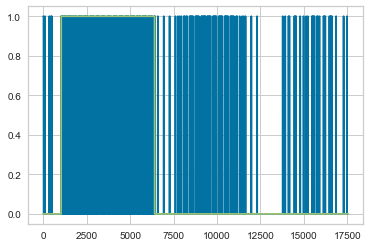

In [110]:
plt.plot(tot.index, tot["Anomaly"] )
plt.plot(y.index, y["Label"] )

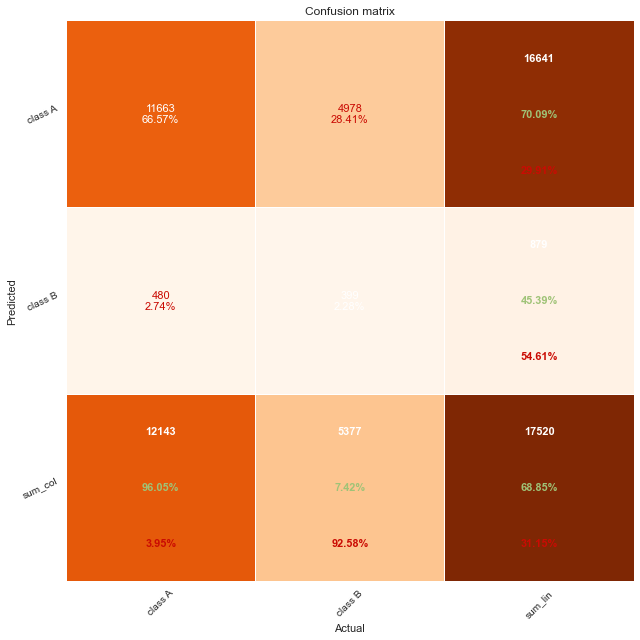

In [115]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])

In [180]:
pca = create_model('pca')
print(pca)


PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=3567, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)


In [182]:
result = assign_model(pca)
result

Unnamed: 0  Node 11  Link 9  Link 10  Link 11  Link 12  Link 22  \
7691         7691     21.6   147.6    147.6     21.6     25.2      3.6   
4592         4592     10.8   759.6    129.6     10.8     25.2     10.8   
11794       11794     32.4   262.8    262.8     32.4     46.8     10.8   
15563       15563     25.2   169.2    169.2     25.2     28.8      3.6   
10417       10417     21.6   169.2    169.2     21.6     32.4      7.2   
...           ...      ...     ...      ...      ...      ...      ...   
6400         6400     14.4   759.6    136.8     14.4     25.2     10.8   
15288       15288     36.0   259.2    259.2     36.0     46.8      7.2   
11513       11513     43.2   320.4    320.4     43.2     57.6     10.8   
1688         1688      7.2   756.0     68.4      7.2     14.4      3.6   
5994         5994     10.8   759.6    118.8     10.8     21.6      7.2   

       Link 111  Link 112  Link 113  ...  Pressure 11  Pressure 12  \
7691       39.6      43.2      14.4  ...      123.155      125.749   
4592       36.0      39.6      10.8  ...        2.007        4.659   
11794      68.4      79.2      25.2  ...      111.019      112.738   
15563      43.2      50.4      14.4  ...      121.534      124.014   
10417      43.2      50.4      14.4  ...      121.290      123.740   
...         ...       ...       ...  ...          ...          ...   
6400       36.0      43.2      10.8  ...        1.898        4.521   
15288      68.4      79.2      25.2  ...      111.260      113.022   
11513      82.8      97.2      28.8  ...      101.995      103.124   
1688       18.0      21.6       7.2  ...        3.178        6.113   
5994       32.4      36.0      10.8  ...        2.269        4.991   

       Pressure 13  Pressure 21  Pressure 22  Pressure 23  Pressure 31  \
7691       126.978      125.263      126.798      128.316      124.782   
4592         5.919        4.257        5.779        7.286        4.013   
11794      113.382      111.290      112.824      114.325      109.964   
15563      125.177      123.430      124.961      126.479      122.828   
10417      124.861      123.116      124.647      126.160      122.439   
...            ...          ...          ...          ...          ...   
6400         5.740        4.094        5.612        7.111        3.874   
15288      113.717      111.640      113.172      114.682      110.313   
11513      103.351      101.106      102.633      104.125       99.114   
1688         7.561        5.996        7.521        9.042        5.900   
5994         6.285        4.655        6.178        7.687        4.440   

       Pressure 32  Anomaly  Anomaly_Score  
7691       121.675        0   4.001930e+16  
4592         0.963        0   6.161359e+16  
11794      106.550        0   3.453542e+16  
15563      119.595        0   3.941594e+16  
10417      119.274        0   3.349321e+16  
...            ...      ...            ...  
6400         0.817        0   5.992165e+16  
15288      106.747        0   3.766026e+16  
11513       95.420        0   4.997932e+16  
1688         2.847        1   7.363998e+16  
5994         1.388        0   6.208898e+16  

[14016 rows x 24 columns]

In [184]:
predictions = predict_model(pca, data = X_test)
predictions

Unnamed: 0  Node 11  Link 9  Link 10  Link 11  Link 12  Link 22  \
14658       14658     43.2   320.4    320.4     43.2     54.0     14.4   
16322       16322     18.0   126.0    126.0     18.0     21.6      3.6   
14447       14447     21.6   169.2    169.2     21.6     28.8      7.2   
7817         7817     39.6   320.4    320.4     39.6     57.6     14.4   
9004         9004     46.8   331.2    331.2     46.8     61.2     10.8   
...           ...      ...     ...      ...      ...      ...      ...   
2961         2961     10.8   759.6    129.6     10.8     25.2     10.8   
16801       16801     18.0   129.6    129.6     18.0     21.6      3.6   
4550         4550     10.8   759.6    136.8     10.8     28.8     10.8   
7955         7955     39.6   306.0    306.0     39.6     54.0     10.8   
3211         3211     14.4   759.6    133.2     14.4     25.2      7.2   

       Link 111  Link 112  Link 113  ...  Pressure 11  Pressure 12  \
14658      82.8      93.6      28.8  ...      102.541      103.709   
16322      32.4      36.0      10.8  ...      124.808      127.519   
14447      43.2      50.4      14.4  ...      121.415      123.873   
7817       82.8      97.2      28.8  ...      102.508      103.611   
9004       86.4     100.8      28.8  ...      100.289      101.332   
...         ...       ...       ...  ...          ...          ...   
2961       36.0      39.6      14.4  ...        2.022        4.669   
16801      32.4      36.0      10.8  ...      124.517      127.215   
4550       36.0      43.2      10.8  ...        1.903        4.520   
7955       79.2      93.6      28.8  ...      104.478      105.766   
3211       36.0      39.6      10.8  ...        1.993        4.643   

       Pressure 13  Pressure 21  Pressure 22  Pressure 23  Pressure 31  \
14658      104.044      101.743      103.271      104.755       99.884   
16322      128.823      127.155      128.693      130.214      126.724   
14447      125.007      123.267      124.798      126.315      122.677   
7817       103.847      101.578      103.109      104.593       99.811   
9004       101.502       99.166      100.693      102.195       97.081   
...            ...          ...          ...          ...          ...   
2961         5.937        4.263        5.785        7.291        4.021   
16801      128.510      126.865      128.394      129.913      126.523   
4550         5.732        4.099        5.613        7.104        3.883   
7955       106.155      103.839      105.386      106.886      101.909   
3211         5.899        4.237        5.760        7.267        4.008   

       Pressure 32  Anomaly  Anomaly_Score  
14658       96.245        0   5.149378e+16  
16322      123.598        0   4.823154e+16  
14447      119.515        0   3.590848e+16  
7817        96.079        0   4.962573e+16  
9004        93.398        0   5.350049e+16  
...            ...      ...            ...  
2961         0.966        0   6.161178e+16  
16801      123.402        0   4.834921e+16  
4550         0.830        0   6.109114e+16  
7955        98.323        0   4.627740e+16  
3211         0.954        0   6.094184e+16  

[3504 rows x 24 columns]

In [185]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

Unnamed: 0       Node 11        Link 9       Link 10       Link 11  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean    8759.500000     25.210068    398.955411    200.786096     25.210068   
std     5057.732694     12.864225    247.190489     86.845689     12.864225   
min        0.000000      3.600000     93.600000   -986.400000      3.600000   
25%     4379.750000     10.800000    223.200000    126.000000     10.800000   
50%     8759.500000     25.200000    288.000000    198.000000     25.200000   
75%    13139.250000     36.000000    759.600000    270.000000     36.000000   
max    17519.000000     61.200000    759.600000    446.400000     61.200000   

            Link 12       Link 22      Link 111      Link 112      Link 113  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      36.300411      8.805000     51.857466     59.776438     18.178767   
std       14.642897      3.638183     21.552400     25.069313      7.981448   
min        3.600000    -50.400000   -133.200000    -14.400000     -3.600000   
25%       25.200000      7.200000     32.400000     39.600000     10.800000   
50%       36.000000     10.800000     50.400000     57.600000     18.000000   
75%       46.800000     10.800000     68.400000     79.200000     25.200000   
max      118.800000     21.600000    108.000000    248.400000     90.000000   

       ...   Pressure 11   Pressure 12   Pressure 13   Pressure 21  \
count  ...  17520.000000  17520.000000  17520.000000  17520.000000   
mean   ...     78.788028     80.916195     81.835479     79.949577   
std    ...     51.405668     51.083796     50.885555     50.748192   
min    ...      1.430000      3.909000      5.003000      3.356000   
25%    ...      2.898750      5.772750      7.176000      5.599750   
50%    ...    107.595000    109.088500    109.606000    107.456500   
75%    ...    115.901250    117.968000    118.853750    116.949250   
max    ...    126.699000    129.553000    130.956000    129.358000   

        Pressure 22   Pressure 23   Pressure 31   Pressure 32       Anomaly  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      81.480595     82.986019     79.058161     75.727684      0.050228   
std       50.753253     50.754017     50.371701     50.225787      0.218422   
min        4.859000      6.343000      3.138000      0.127000      0.000000   
25%        7.123750      8.641750      5.473750      2.418750      0.000000   
50%      109.000500    110.499000    105.877500    102.277500      0.000000   
75%      118.480250    119.990750    115.927250    112.541000      0.000000   
max      130.888000    132.410000    129.155000    126.067000      1.000000   

       Anomaly_Score  
count   1.752000e+04  
mean    4.894618e+16  
std     1.400493e+16  
min     2.895114e+16  
25%     3.636762e+16  
50%     4.623619e+16  
75%     6.186151e+16  
max     2.892762e+17  

[8 rows x 24 columns]

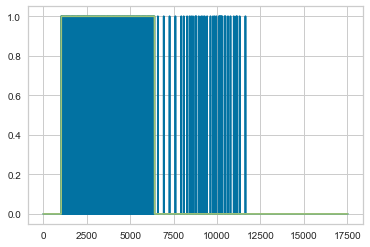

In [186]:
plt.plot(tot.index, tot["Anomaly"] )
plt.plot(y.index, y["Label"] )

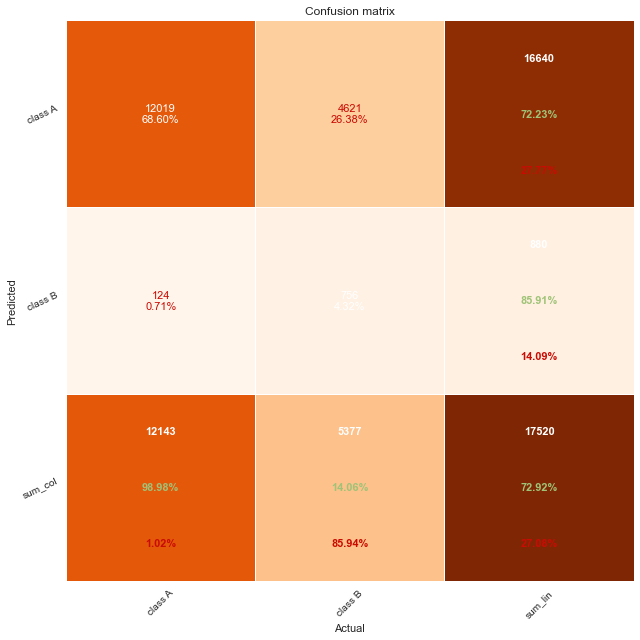

In [187]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])